In [22]:
# gmaps and googlemaps are 2 different lbraries 
# gmaps = https://github.com/pbugnion/gmaps
# googlemaps = https://github.com/googlemaps/google-maps-services-python
import gmaps
import gmaps.datasets
import gmaps.directions
import googlemaps.distance_matrix 
import time
from IPython import display
from IPython.display import Image
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import os

# start with  : jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

In [23]:
path = os.getcwd()

In [24]:
api_key = ""

In [ ]:
google_maps = googlemaps.Client(key=api_key)
gmaps.configure(api_key=api_key)  # proje adi :MyProject

In [26]:
def frange(start,stop, step=1.0):
    while start < stop:
        yield start
        start +=step

In [27]:
def create_grid_boundary(points , stepsize = 0.0015): # approximately the block size)
    list_of_points = []
    
    lons_vect = np.array([x[0] for x in points])
    lats_vect = np.array([y[1] for y in points])
    
    lonmin = min(lons_vect)
    lonmax = max(lons_vect)
    latmin = min(lats_vect)
    latmax = max(lats_vect)
    
    print(points)
    polygon = Polygon(points) # create polygon
    print(polygon)
    for x in frange(lonmin, lonmax, stepsize):
        for y in frange(latmin,latmax, stepsize):
            point = Point(x,y) # create point
            if(polygon.contains(point)):
                list_of_points.append((x,y))
    print(len(list_of_points))
    return list_of_points

In [21]:
# Points have to be in order, like top left, top right, botright, bottom right.
# No crossing the region in consecutive points

points = {}
points['pac_heights'] = [
                    [37.795564,-122.4240006],\
                    [37.7941704,-122.4348963],\
                    [37.7846807,-122.4330036],\
                    [37.7858192,-122.4219139],
                    ]
points['pac_heights_step_size'] = 0.002





points['nob_hill'] = [
                    [37.7959282,-122.4217715],\
                    [37.7972973,-122.412094],\
                    [37.7919313,-122.4109791],\
                    [37.7905756,-122.4207343],
                  ]

points['nob_hill_step_size'] = 0.002





points['portrero_and_mission_bay'] = [
                                        [37.77593, -122.39018],\
                                        [37.77604, -122.38718],\
                                        [37.75449, -122.38554],\
                                        [37.75449, -122.39121],\
                                        [37.76024, -122.39185],\
                                        [37.75951, -122.40387],\
                                        [37.76979, -122.4043],\
                                        [37.77013, -122.39683],           
                                    ]

points['portrero_and_mission_bay_step_size'] = 0.004





points['soma_small'] = [
                                        [37.7838, -122.40752],\
                                        [37.79418, -122.39464],\
                                        [37.78882, -122.38821],\
                                        [37.78123, -122.38881],\
                                        [37.77549, -122.39683],      
                                    ]
points['soma_small_step_size'] = 0.004




points['soma_large'] = [
                                        [37.77183, -122.40095],\
                                        [37.78048, -122.41207],\
                                        [37.79418, -122.39464],\
                                        [37.78882, -122.38821],\
                                        [37.78123, -122.38881],      
                                    ]
points['soma_large_step_size'] = 0.004



points['soma_and_portrero_and_mission_bay'] = [
                                        [37.77183, -122.40095],\
                                        [37.78048, -122.41207],\
                                        [37.79418, -122.39464],\
                                        [37.78882, -122.38821],\
                                        [37.78123, -122.38881],\
                                        [37.77604, -122.38718],\
                                        [37.75449, -122.38554],\
                                        [37.75449, -122.39121],\
                                        [37.76024, -122.39185],\
                                        [37.75951, -122.40387],\
                                        [37.76979, -122.4043],         
                                    ]
points['soma_and_portrero_and_mission_bay_step_size'] = 0.006


keys = ['pac_heights', 'nob_hill','portrero_and_mission_bay'\
        ,'soma_small','soma_large','soma_and_portrero_and_mission_bay']


In [11]:
grids = {}
for key in keys:
    grids[key] = create_grid_boundary(points[key], stepsize = points[key+'_step_size'])

[[37.795564, -122.4240006], [37.7941704, -122.4348963], [37.7846807, -122.4330036], [37.7858192, -122.4219139]]
POLYGON ((37.795564 -122.4240006, 37.7941704 -122.4348963, 37.7846807 -122.4330036, 37.7858192 -122.4219139, 37.795564 -122.4240006))
26
[[37.7959282, -122.4217715], [37.7972973, -122.412094], [37.7919313, -122.4109791], [37.7905756, -122.4207343]]
POLYGON ((37.7959282 -122.4217715, 37.7972973 -122.412094, 37.7919313 -122.4109791, 37.7905756 -122.4207343, 37.7959282 -122.4217715))
12
[[37.77593, -122.39018], [37.77604, -122.38718], [37.75449, -122.38554], [37.75449, -122.39121], [37.76024, -122.39185], [37.75951, -122.40387], [37.76979, -122.4043], [37.77013, -122.39683]]
POLYGON ((37.77593 -122.39018, 37.77604 -122.38718, 37.75449 -122.38554, 37.75449 -122.39121, 37.76024 -122.39185, 37.75951 -122.40387, 37.76979 -122.4043, 37.77013 -122.39683, 37.77593 -122.39018))
13
[[37.7838, -122.40752], [37.79418, -122.39464], [37.78882, -122.38821], [37.78123, -122.38881], [37.77549, 

In [12]:
%matplotlib inline

fig = gmaps.figure()
marker_layer = gmaps.marker_layer(grids['portrero_and_mission_bay'])
fig.add_layer(marker_layer)
display.display(fig)

Figure(layout=FigureLayout(height='420px'))

In [13]:
this_grid = grids['portrero_and_mission_bay']
print(len(this_grid))
groups = []
group_size = 10
group_iter = 0 
while group_iter*group_size < len(this_grid):
    this_group = this_grid[group_size*group_iter:group_size*(group_iter+1)]
    groups.append(this_group)
    print("Group " + str(group_iter) + " : ")
    print("Group size : " + str(len(groups[group_iter])))
    group_iter+=1

13
Group 0 : 
Group size : 10
Group 1 : 
Group size : 3


In [14]:
print(groups[0])
print("\nBreak\n")
print(groups[1])

distance_matrix_result = google_maps.distance_matrix(groups[0], groups[1])

[(37.758489999999995, -122.38829999999999), (37.76248999999999, -122.4003), (37.76248999999999, -122.3963), (37.76248999999999, -122.39229999999999), (37.76248999999999, -122.38829999999999), (37.76648999999999, -122.4003), (37.76648999999999, -122.3963), (37.76648999999999, -122.39229999999999), (37.76648999999999, -122.38829999999999), (37.77048999999999, -122.3963)]

Break

[(37.77048999999999, -122.39229999999999), (37.77048999999999, -122.38829999999999), (37.774489999999986, -122.38829999999999)]


ApiError: REQUEST_DENIED (You must enable Billing on the Google Cloud Project at https://console.cloud.google.com/project/_/billing/enable.Learn more at https://developers.google.com/maps/gmp-get-started)

In [42]:
all_groups = []
distance_matrix_result_second = {}
for i in range(0,len(groups)):
    distance_matrix_result_second[i] = {}
    for j in range(0,len(groups)):
        #print(str(i) + "  " +  str(j))
        all_groups.append([i,j])
        distance_matrix_result_second[i][j] = google_maps.distance_matrix(groups[i], groups[j])
        time.sleep(0.1)
print(len(all_groups))

121


In [43]:
print(distance_matrix_result_second)

{0: {0: {u'status': u'OK', u'rows': [{u'elements': [{u'duration': {u'text': u'1 min', u'value': 0}, u'distance': {u'text': u'1 m', u'value': 0}, u'status': u'OK'}, {u'duration': {u'text': u'1 min', u'value': 79}, u'distance': {u'text': u'0.3 km', u'value': 255}, u'status': u'OK'}, {u'duration': {u'text': u'1 min', u'value': 59}, u'distance': {u'text': u'0.3 km', u'value': 253}, u'status': u'OK'}, {u'duration': {u'text': u'1 min', u'value': 74}, u'distance': {u'text': u'0.3 km', u'value': 339}, u'status': u'OK'}, {u'duration': {u'text': u'2 mins', u'value': 94}, u'distance': {u'text': u'0.4 km', u'value': 427}, u'status': u'OK'}, {u'duration': {u'text': u'3 mins', u'value': 174}, u'distance': {u'text': u'0.8 km', u'value': 821}, u'status': u'OK'}, {u'duration': {u'text': u'3 mins', u'value': 187}, u'distance': {u'text': u'0.9 km', u'value': 908}, u'status': u'OK'}, {u'duration': {u'text': u'4 mins', u'value': 237}, u'distance': {u'text': u'1.3 km', u'value': 1277}, u'status': u'OK'}, {u

In [41]:
print distance_matrix_result

for i in distance_matrix_result['origin_addresses']: print i

{u'status': u'OK', u'rows': [{u'elements': [{u'duration': {u'text': u'1 min', u'value': 34}, u'distance': {u'text': u'0.1 km', u'value': 98}, u'status': u'OK'}, {u'duration': {u'text': u'2 mins', u'value': 97}, u'distance': {u'text': u'0.4 km', u'value': 357}, u'status': u'OK'}, {u'duration': {u'text': u'1 min', u'value': 77}, u'distance': {u'text': u'0.3 km', u'value': 264}, u'status': u'OK'}, {u'duration': {u'text': u'2 mins', u'value': 106}, u'distance': {u'text': u'0.4 km', u'value': 356}, u'status': u'OK'}, {u'duration': {u'text': u'2 mins', u'value': 122}, u'distance': {u'text': u'0.4 km', u'value': 437}, u'status': u'OK'}, {u'duration': {u'text': u'2 mins', u'value': 147}, u'distance': {u'text': u'0.5 km', u'value': 524}, u'status': u'OK'}, {u'duration': {u'text': u'3 mins', u'value': 177}, u'distance': {u'text': u'0.7 km', u'value': 656}, u'status': u'OK'}, {u'duration': {u'text': u'3 mins', u'value': 189}, u'distance': {u'text': u'0.7 km', u'value': 697}, u'status': u'OK'}, {u

In [12]:
def getNextTime(hour_of_day, day_of_week):
    
    options = {'Monday': 0,
               'Tuesday' : 1,
               'Wednesday' : 2,
               'Thursday' : 3,
               'Friday' : 4,
               'Saturday' : 5,
               'Sunday' : 6,
        }
    
    
    test = datetime.now().replace(hour=hour_of_day, minute=0, second=0, microsecond=0)
    if datetime.now() > test:
        test = test + timedelta(days=1)
    while(test.weekday() != options[day_of_week]): # 5 = Saturday
        test = test + timedelta(days=1)
    return test

In [13]:
def generate_key(first_point,second_point):
    return str(first_point[0]) + "_" +\
              str(first_point[1]) + ":" +\
              str(second_point[0]) + "_" +\
              str(second_point[1])

In [14]:
# index distances between all points in a grid
def fetch_time_in_traffic(grid, hour_of_day, day_of_week, sleep_throttle = 0.005):
    departure_time = getNextTime(hour_of_day, day_of_week)
    results = {}
    i = 0 
    print('Total iterations: ' +  str(len(grid)**2))
    for first_point in grid:
        for second_point in grid: 
            distance_matrix_result = google_maps.distance_matrix(first_point, second_point,\
                                                         departure_time=departure_time)
            key = generate_key(first_point,second_point)
            results[key] = {}
            results[key]['dist'] = distance_matrix_result['rows'][0]['elements'][0]['distance'] 
            results[key]['time'] = distance_matrix_result['rows'][0]['elements'][0]['duration_in_traffic']
            time.sleep(sleep_throttle)
            i+=1
            if (i%100 == 0): print(i)
    return results


In [15]:
day_of_week = 'Wednesday'
neighbourhoods = ['portrero_and_mission_bay'] 
for neighbourhood in neighbourhoods:
    time_in_traffic = {}
    time_in_traffic[day_of_week] = {}
    for hour in range(8,22):
        print("Neighbourhood : " +  str(neighbourhood) + " Day : " + str(day_of_week) + " Hour : " + str(hour))
        try:
            time_in_traffic[day_of_week][hour] = fetch_time_in_traffic(grids[neighbourhood],\
                                                                       hour ,day_of_week)
        except Exception, e:
            time_in_traffic[day_of_week][hour] = str(e)
        
        np.save(path+"/Data/" + str(neighbourhood) +"_traffic_distances.npy", time_in_traffic) 

Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 8
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 9
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 10
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 11
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 12
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 13
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 14
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 15
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 16
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 17
Total iterations: 169
100
Neighbourhood : portrero_and_mission_bay Day : Wednesday Hour : 18
Total

In [16]:
pac_heights_reloaded = np.load(path+"/Data/portrero_and_mission_bay_traffic_distances.npy").item()
for i in pac_heights_reloaded: print(i+"  " + str(pac_heights_reloaded[i]))

Wednesday  {8: {'37.76648999999999_-122.39229999999999:37.76248999999999_-122.39229999999999': {'dist': {u'text': u'3.3 km', u'value': 3296}, 'time': {u'text': u'7 mins', u'value': 409}}, '37.76648999999999_-122.4003:37.76648999999999_-122.3963': {'dist': {u'text': u'0.4 km', u'value': 351}, 'time': {u'text': u'1 min', u'value': 46}}, '37.76248999999999_-122.4003:37.77048999999999_-122.39229999999999': {'dist': {u'text': u'2.0 km', u'value': 2006}, 'time': {u'text': u'9 mins', u'value': 527}}, '37.76648999999999_-122.4003:37.77048999999999_-122.38829999999999': {'dist': {u'text': u'1.5 km', u'value': 1513}, 'time': {u'text': u'5 mins', u'value': 314}}, '37.758489999999995_-122.38829999999999:37.76248999999999_-122.39229999999999': {'dist': {u'text': u'2.5 km', u'value': 2465}, 'time': {u'text': u'6 mins', u'value': 360}}, '37.77048999999999_-122.3963:37.76248999999999_-122.4003': {'dist': {u'text': u'1.5 km', u'value': 1487}, 'time': {u'text': u'5 mins', u'value': 312}}, '37.7704899999

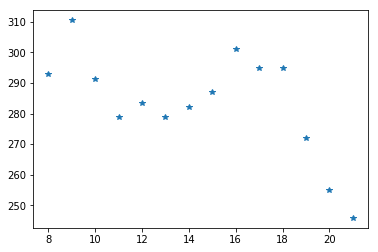

In [17]:
traffic_times_avg = []
hours = [x for x in range(8,22)]
for hour in hours:
    d = pac_heights_reloaded['Wednesday'][hour]
    traffic_times =  []
    for key in d:
        traffic_times.append(d[key]['time']['value'])
        #print(d[key]['time']['value'])
    if(len(traffic_times)>0):
        traffic_times_avg.append(sum(traffic_times)/float(len(traffic_times)))
    
plt.plot(hours[0:len(traffic_times_avg)],traffic_times_avg,'*')
plt.show()

In [18]:
traffic_times_avg = []
hours = [x for x in range(8,22)]
for hour in hours:
    d = nob_hill_reloaded['Wednesday'][hour]
    traffic_times =  []
    for key in d:
        traffic_times.append(d[key]['time']['value'])
        #print(d[key]['time']['value'])
    traffic_times_avg.append(sum(traffic_times)/float(len(traffic_times)))
    
plt.plot(hours,traffic_times_avg,'*')
plt.show()

NameError: name 'nob_hill_reloaded' is not defined